# Final Project 
## David Weissenberger 
### 5/14/2021

For this project I examined the Austin, Texas Airbnb data about prices, the types of rentals, and the reviews they got. In this project I created visualizations of the most popular areas to rent, the type of house, the amount of bathrooms, the amount of bedrooms, the year the host joined Airbnb, and the minimum and maximum nights to stay. After that I performed a KNN Regression model to predict the price, a neural network to predict whether a host is good or not, and a text analysis on reviews. Below are my target grades and I attempted to achieve the high target. 
### Low Target: To be able to achieve C level work I would need to do one of the data analysis approaches I talked about, one of the visualizations, and not clean the data of null values. 
### Medium Target: To be able to achieve B level work I would need to do all of the visualizations besides the challenge one I set out for myself, I would need to do both the text analysis and the KKN model but not develop the neural network, and I would need to have cleaned all of the data of null values. 
### High Target: To be able to achieve A level work I need to complete all of model and text analysis, all of the visualizations that I have described, and to have cleaned all of the data. A level work means exceeding what you set out to do which means that all of my models should have high accuracies and my visualizations should be clear and understandable. A level work also means throwing in more of challenge for yourself, for this project it might be creating a cluster model of the location of the homes or a SNA of the location of the homes. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,2.020000e+13,2/12/21,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,NaN,https://a0.muscache.com/pictures/4740524/63f82...,2466,https://www.airbnb.com/users/show/2466,Paddy,8/23/08,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3,3,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27750,-97.71398,Entire house,Entire home/apt,4,NaN,2 baths,2,2,"[""Free parking on premises"", ""Hair dryer"", ""Pa...",$200.00,7,180,7,7,180,180,7.0,180.0,NaN,t,13,13,42,131,2/12/21,24,0,0,3/17/09,3/16/19,93.0,9.0,10.0,10.0,10.0,8.0,9.0,NaN,f,3,2,1,0,0.17
1,5245,https://www.airbnb.com/rooms/5245,2.020000e+13,2/12/21,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,NaN,https://a0.muscache.com/pictures/5167505/b33b5...,2466,https://www.airbnb.com/users/show/2466,Paddy,8/23/08,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3,3,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27577,-97.71379,Private room in house,Private room,2,NaN,1 private bath,1,2,"[""Free parking on premises"", ""Hair dryer"", ""Br...",$114.00,30,60,30,30,60,60,30.0,60.0,NaN,t,0,0,0,0,2/12/21,9,0,0,3/19/09,3/14/18,91.0,10.0,8.0,10.0,9.0,10.0,9.0,NaN,f,3,2,1,0,0.06
2,5456,https://www.airbnb.com/rooms/5456,2.020000e+13,2/12/21,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2/16/09,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within a few hours,100%,91%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, Texas, United States",78702,NaN,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1,2,"[""Hair dryer"", ""Dishes and silverware"", ""Air c...",$104.00,2,90,2,2,90,90,2.0,90.0,NaN,t,24,54,84,354,2/12/21,543,20,3,3/8/09,2/1/21,97.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,3.74
3,5636,https://www.airbnb.com/rooms/5636,2.020000e+13,2/12/21,"Soco, Barton Springs Private Guest Cottage",MONTHLY Short 

# Visualizations 

In [ ]:
# Finding the top 10 most popular neighbourhoods that have rentals
df.value_counts('host_neighbourhood').head(10)

host_neighbourhood
East Downtown          584
Cherrywood             353
Downtown               305
East Riverside         286
Zilker                 226
University of Texas    207
Travis Heights         200
Barton Hills           197
South Lamar            187
West Campus            180
dtype: int64

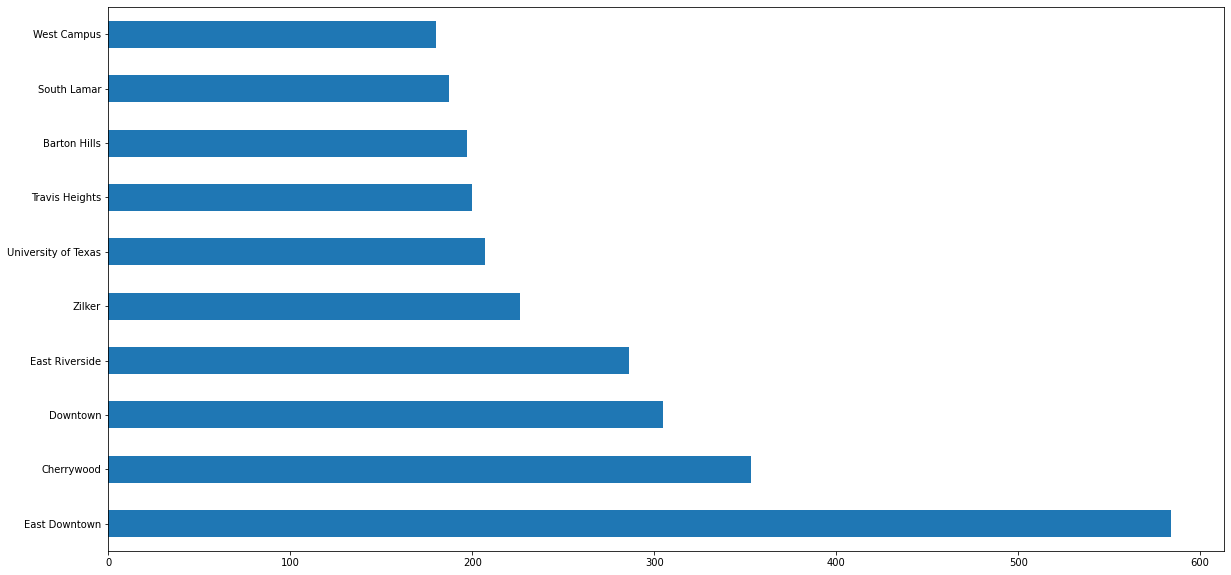

In [ ]:
# Graphing the top 10 most popular neighbourhoods
df['host_neighbourhood'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

This graph is able to show us that East Downtown has almost doubled the Airbnbs of the next most popular neighbourhood of Cherrywood. With this information we might be able to implie that East Downtown is a great place to go out in town and that it is the more popular side of the city. 

In [ ]:
# Showing the top 10 most popular property types available to rent 
df.value_counts('property_type').head(10)


property_type
Entire house                 3038
Entire apartment             1673
Private room in house        1307
Entire condominium            807
Entire serviced apartment     414
Private room in apartment     386
Entire guesthouse             348
Entire townhouse              258
Entire bungalow               203
Entire guest suite            164
dtype: int64

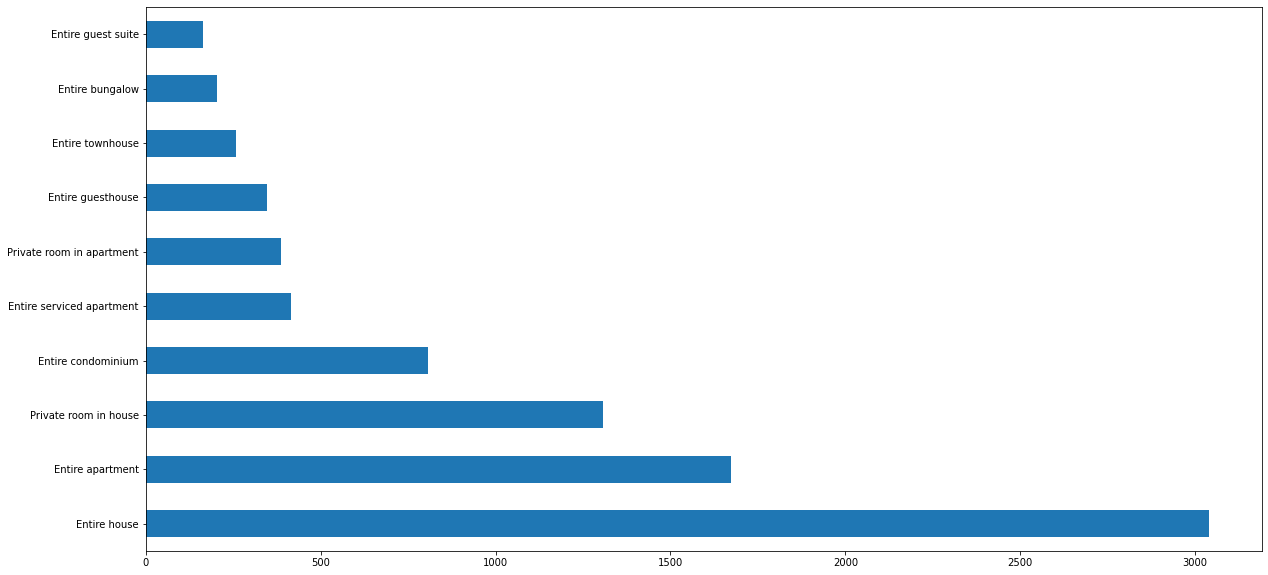

In [ ]:
# Graphing the top 10 most popular property types 
df['property_type'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

This is an interesting graphic, usually when you think of Airbnbs in a city you would assume that you would be staying in an apartment. However, there are over 1,000 more houses available then apartments. This shows that Austin has a lot of residential areas compared to apartment buildings. 

In [ ]:
# Finding the most common amount of bathrooms 
df.value_counts('bathrooms_text').head(10)

bathrooms_text
1 bath              3854
2 baths             2068
1 shared bath        745
2.5 baths            669
1 private bath       616
1.5 baths            463
3 baths              369
3.5 baths            172
1.5 shared baths     162
4 baths              126
dtype: int64

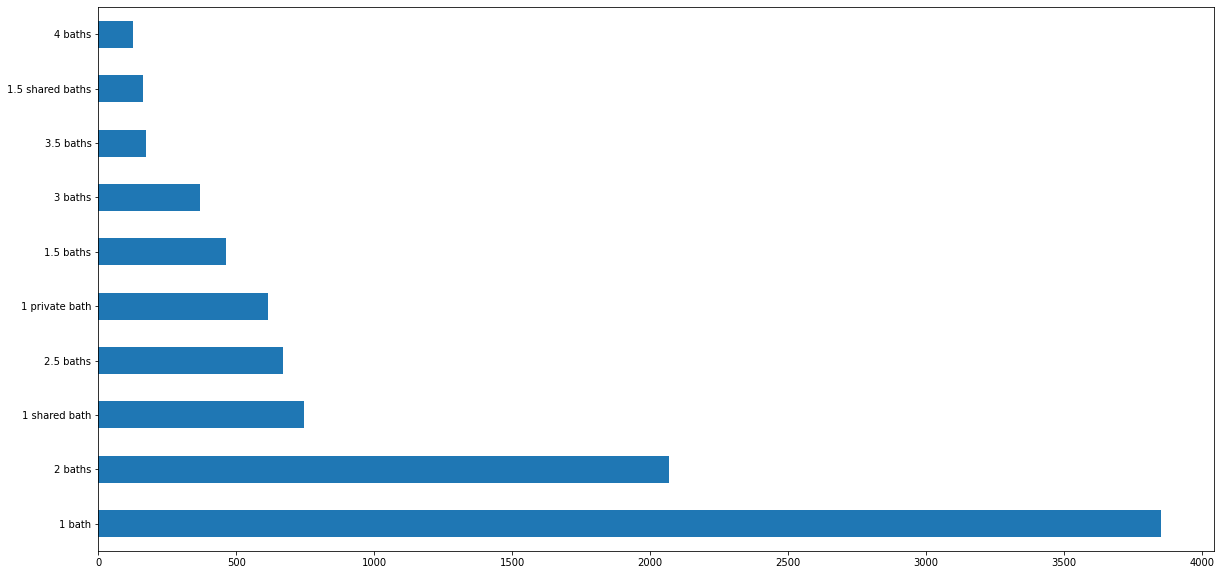

In [ ]:
# Graphing the most common number of bathrooms 
df['bathrooms_text'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

This graph is interesting because usually when you think of being able to rent an entire house you think that there would be more then one bathroom. This graph shows that there are far more Airbnbs with only one bathroom then compared to 2.

In [ ]:
# Finding the most typical amount of bedrooms for a rental 
df.value_counts('bedrooms').head(10)


bedrooms
1     4706
2     2423
3     1405
4      622
5      228
6       73
7       27
8       17
9        7
10       5
dtype: int64

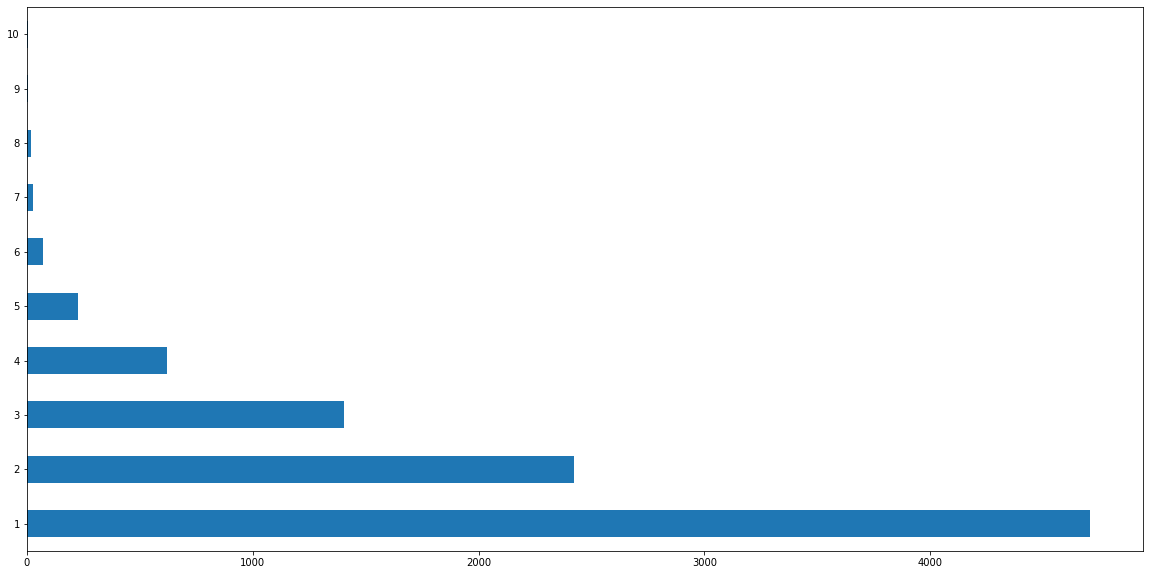

In [ ]:
# Graphing the most common number of bedrooms
df['bedrooms'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

Again like the previous graph this shows that 1 bedroom Airbnbs are far more popular. Some of the houses must be one bedroom but it also makes sense because most of the other property type Airbnbs are most likely a one bedroom layout. 

In [ ]:
# Finding the most common minimum nights of a stay 
df.value_counts('minimum_nights').head(10)

minimum_nights
2     3368
1     2898
3     1103
30     936
4      226
5      190
7      152
90     101
31      93
29      78
dtype: int64

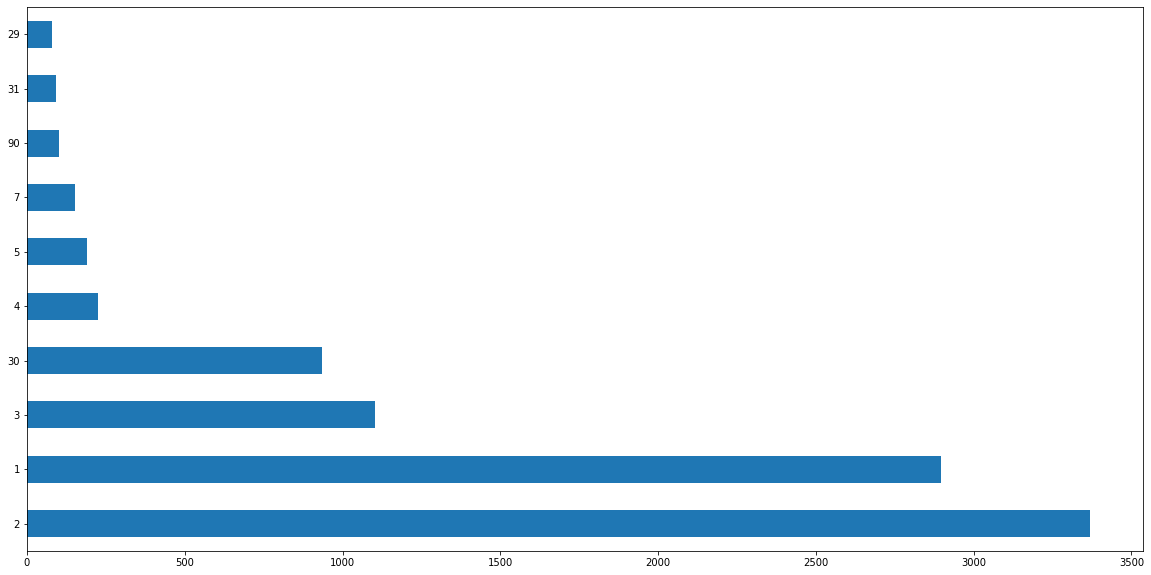

In [ ]:
# Graphing the most common minimum nights of a stay 
df['minimum_nights'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

Minimum night stay isn't too surprising of an information. It seems that most host are willing to offer their houses for under 10 tens. However, there is a surprising number of houses that have a minimum of 30 and 90 nights which means that those host are looking for longer term renters. 

In [ ]:
# Finding the most common maximum nights of a stay 
df.value_counts('maximum_nights').head(10)

maximum_nights
1125    4652
365      860
30       466
7        412
14       353
10       231
90       219
60       190
5        173
180      170
dtype: int64

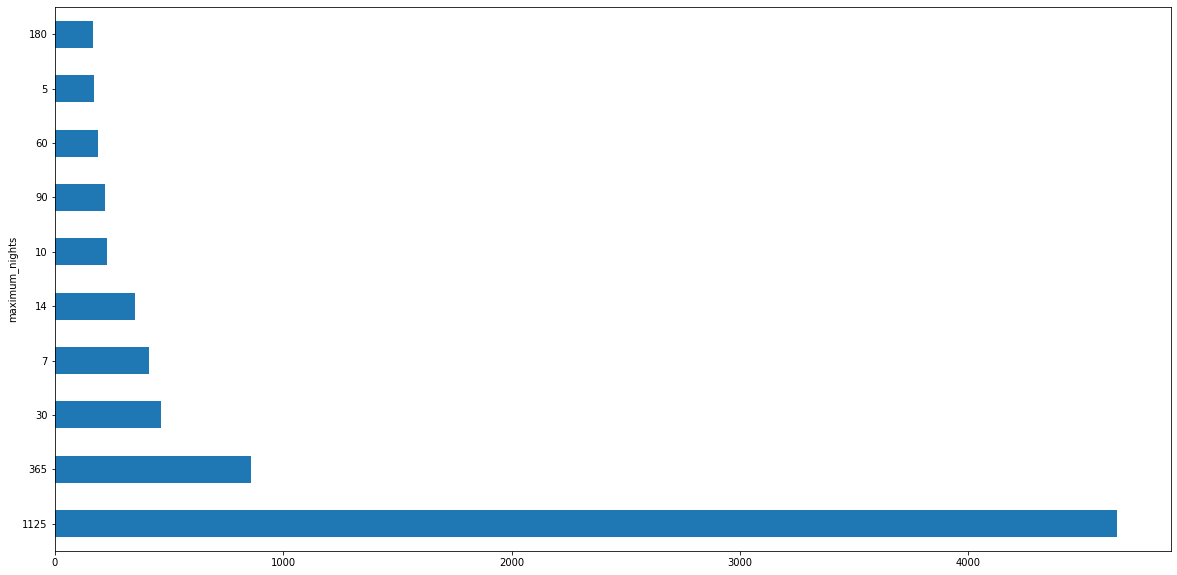

In [ ]:
# Graphing the most common maximum nights of a stay 
df.value_counts('maximum_nights').head(10).plot(kind='barh', figsize=(20,10))

Having a maximum night stay of 1125 is much higher then I thought to see. I think it shows that these host are willing to rent out to the same person as long as someones in the house or property type. 

In [ ]:
# Formatting the 'host_since' column to a year format to be able to retrieve the year more easily 
years = pd.to_datetime(df['host_since'],format='%m/%d/%y')
years

0      2008-08-23
1      2008-08-23
2      2009-02-16
3      2009-01-27
4      2009-02-19
          ...    
9513   2020-09-23
9514   2020-09-23
9515   2020-07-28
9516   2020-07-28
9517   2021-02-09
Name: host_since, Length: 9518, dtype: datetime64[ns]

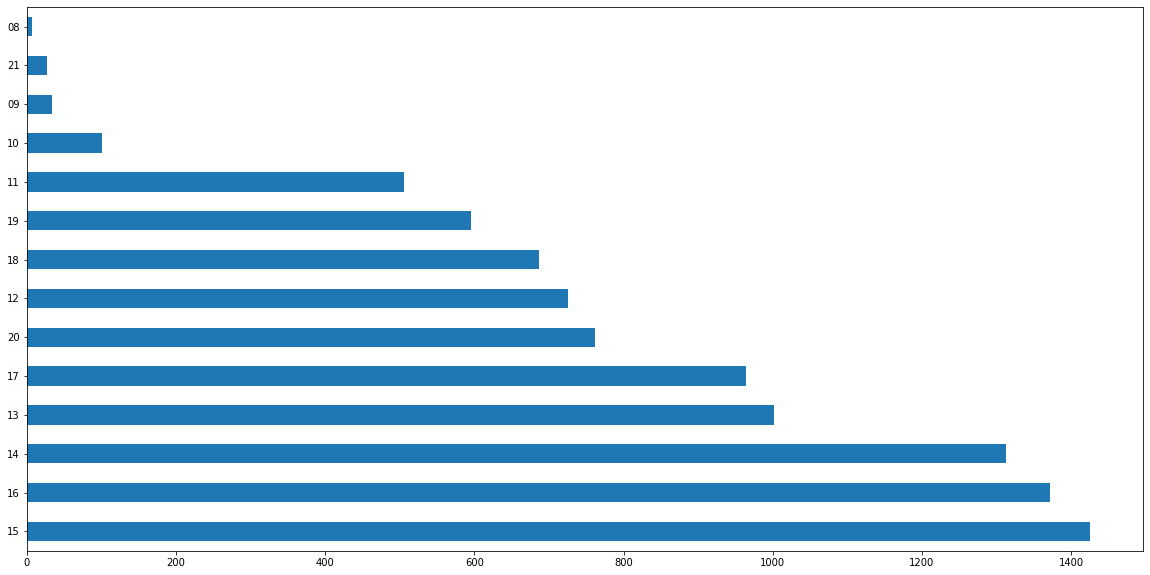

In [ ]:
# Taking the year from the 'host_since' and finding the most popular year that host joined Airbnb
# Each year is represented as the last two digits of their year (2015 -> 15)
df['host_since'].str[-2:].value_counts().plot(kind='barh', figsize=(20,10))

Based on this information it seems like there was a huge increase in becoming a host between 2014-2016. A reason for this might be that in 2014 Airbnb opened up a second headquaters in Portland, Oregon. 

# KNeighbors Regression Model

In [ ]:
# Creating the X data for my KNeighbors regression model 
# Believe that 'accomodates', 'bedrooms', 'beds', 'number_of_reviews' are important values when predicting price because
# the ammount it accomodates, the number of bedrooms and beds usually the higher these are the higher the price and the 
# the number of reviews can impact because the more reviews it has the more likely it is that a popular house

X = df[['accommodates', 'bedrooms', 'beds', 'number_of_reviews']].values
print('data:', X.shape)
print(X)

data: (9518, 4)
[[  4   2   2  24]
 [  2   1   2   9]
 [  3   1   2 543]
 ...
 [  3   1   1   0]
 [  3   1   1   0]
 [  6   2   2   0]]


In [ ]:
# Setting y to price as I am trying to be able to predict price
# Before setting it to price I had to remove the dollar sign and convert the number to a float

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

y = df['price']
print('\nlabels:', y.shape)
y


labels: (9518,)


0       200.0
1       114.0
2       104.0
3        46.0
4        39.0
        ...  
9513    185.0
9514    153.0
9515     82.0
9516    153.0
9517    175.0
Name: price, Length: 9518, dtype: float64

In [ ]:
# Splitting the test and training data
# 70% train and 30% test 

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.7, random_state=0)
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)

Xtrain.shape: (2855, 4)
ytrain.shape: (2855,)
Xtest.shape: (6663, 4)
ytest.shape: (6663,)


In [ ]:
# Running the Kneighbors regression model with n_neighbors = 22 to get the lowest possible error
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=22)
model.fit(Xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                    weights='uniform')

In [ ]:
# Creating the y prediction 

ypred = model.predict(Xtest)
ypred

array([200.5       , 239.86363636, 120.63636364, ..., 145.04545455,
       106.5       , 199.95454545])

In [ ]:
ytest

7324    130.0
1427    250.0
2703    120.0
7878    205.0
2579    175.0
        ...  
2383    149.0
7904     78.0
1886     33.0
7896     89.0
1446    200.0
Name: price, Length: 6663, dtype: float64

In [ ]:
# Getting the mean square error of the model to show how far off it was from the actual price

from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred)

201216.2419302724

I ran a Kneighborregression model to try and predict the price of the Airbnb. The model read in how many people the Airbnb accomodates, the number of bedrooms, the number of bathrooms, and the number of reviews that the Airbnb had. I thought these were important factors when trying to determine the price of the Airbnb. I predicted error instead of accuracy to show how far away the price would be. This model predicts the price $201,216.24 which isn't very good, this is most likely because there are a wind range of prices in the dataset. A way I can try to improve this is reading in more data from the dataset. 



# Deep Learning Model

In [ ]:
# Took the description and the host_is_superhost and created a new dataframe with just those two columns

nn_df = df[['description', 'host_is_superhost']].copy()
nn_df.head()

,description,host_is_superhost
0,Zen East is situated in a vibrant & diverse mu...,f
1,Situated in a vibrant & diverse multicultural ...,f
2,Great central location for walking to Convent...,t
3,MONTHLY Short Term <br />Located in the awesom...,f
4,<b>The space</b><br />Looking for a comfortabl...,t


In [ ]:
# Importing all of the packages I need to be able to run the neural network for the text

import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')

def Evaluate(Y_Test, Predictions) :
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    Accuracy = accuracy_score(Y_Test, Predictions)
    Precision = precision_score(Y_Test, Predictions)
    Recall = recall_score(Y_Test, Predictions)
    F1 = f1_score(Y_Test, Predictions)
    Metric = {'Accuracy Score' : round(Accuracy,2),
              'Precision Score' : round(Precision,2),
              'Recall Score' : round(Recall,2),
              'F1 Score' : round(F1,2)}
    print(f'Accuracy Score : {Accuracy * 100:.2f}%')
    print(f'Precision Score : {Precision * 100:.2f}%')
    print(f'Recall Score : {Recall * 100:.2f}%')
    print(f'F1 Score : {F1 * 100:.2f}%')
    return Metric

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
VOCAB_SIZE = 20000
MAX_LEN = 100
EMBEDDING_DIM = 100
NUM_FILTERS = 250
KERNEL_SIZE = 3
HIDDEN_DIMS = 250

In [ ]:
# Converting 'host_is_superhost' to binary where 0 is false and 1 is true
le=LabelEncoder()
nn_df["host_is_superhost"] = le.fit_transform(nn_df["host_is_superhost"])   
nn_df.head()

,description,host_is_superhost
0,Zen East is situated in a vibrant & diverse mu...,0
1,Situated in a vibrant & diverse multicultural ...,0
2,Great central location for walking to Convent...,1
3,MONTHLY Short Term <br />Located in the awesom...,0
4,<b>The space</b><br />Looking for a comfortabl...,1


In [ ]:
# Cleaning and preprocessing the data 
# Tokenizing the text of 'description'

text_input = nn_df['description']   
labels = nn_df['host_is_superhost']  

# text_input.SentimentText=text_input.SentimentText.astype(str)
text_input = text_input.astype(str)

imdb_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
imdb_tokenizer.fit_on_texts(text_input.values)    
X_seq = imdb_tokenizer.texts_to_sequences(text_input.values)
X = sequence.pad_sequences(X_seq, maxlen=MAX_LEN, padding="post", value=0)
y = labels.values

In [ ]:
print(text_input.values[0], '\n')
print(X[0])

Zen East is situated in a vibrant & diverse multicultural neighborhood, within walking distance of many great restaurants, cafes, performance/art spaces, UT campus, downtown & just a few miles from a beautiful trail ~ Ladybird Lake.<br /><br />NOTE: As of 1/20/18, new home construction with intermittent noise is happening at lot next door typically b/w hours of 8 - 5:30 pm. Exterior is 90% complete.<br /><br /><b>The space</b><br />This colorful and clean 1923 house was completely remodeled in 2004. The house is a 2BR/ 2BA (1350 sq') with a pillow top queen bed in the large master with full private bath and a double futon bed (floor level) in an office which converts to a small guest room adjacent to a full bathroom in the hallway. The following amenities are included: CACH, WIFI, HDTV, washer/dryer, fully equipped kitchen, street parking, fenced back yard with semi privacy fence/deck and front yard with covered porch, pecan, crepe myrtle and other trees provide shade and floral displa

In [ ]:
# Splitting the data into test and train, again using 70% for the train data and 30% for the test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print (X_train.shape, X_test.shape)

(6662, 100) (2856, 100)


In [ ]:
# Defining and training the deep learning model

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          2000000   
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 98, 250)           75250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)               0

In [ ]:
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1)

Epoch 1/5
94/94 [==============================] - 11s 102ms/step - loss: 0.6209 - accuracy: 0.6610 - val_loss: 0.5707 - val_accuracy: 0.6972
Epoch 2/5
94/94 [==============================] - 9s 97ms/step - loss: 0.5434 - accuracy: 0.7130 - val_loss: 0.5249 - val_accuracy: 0.7271
Epoch 3/5
94/94 [==============================] - 9s 97ms/step - loss: 0.3734 - accuracy: 0.8439 - val_loss: 0.5310 - val_accuracy: 0.7331
Epoch 4/5
94/94 [==============================] - 9s 96ms/step - loss: 0.2087 - accuracy: 0.9291 - val_loss: 0.7201 - val_accuracy: 0.6867
Epoch 5/5
94/94 [==============================] - 9s 96ms/step - loss: 0.0838 - accuracy: 0.9789 - val_loss: 0.7388 - val_accuracy: 0.7256


In [ ]:
# Evaluating the performance of the model 

score, acc = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)
predicted = model.predict_classes(X_test)
expected = y_test

45/45 [==============================] - 1s 21ms/step - loss: 0.7019 - accuracy: 0.7318

Accuracy:  73.1792688369751


In [ ]:
metrics = Evaluate(y_test, predicted)

Accuracy Score : 73.18%
Precision Score : 59.01%
Recall Score : 65.66%
F1 Score : 62.15%


Here I created a deep learning neural network that read in the description of the Airbnb and tried to predict whether or not the host is a super host (a great host). However, the data is imbalanced with only 26% of the host being super host. In response to this it is better to look at the Precision, recall, and F1 scores over the Accuracy of the model. 

# Text Analysis with NLTK

In [ ]:
# Getting the encoding of the language to be able to read it in 

import chardet
file = 'reviews.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result


{'confidence': 0.99, 'encoding': 'utf-8', 'language': ''}

In [ ]:
# Have to use a specific encoding for the dataset

text_df = pd.read_csv(file, encoding = 'ISO-8859-1')
text_df.head()


,date,reviewer_id,reviewer_name,comments
0,3/17/09,7538,Niall,I stayed here during SXSW and had a really ple...
1,3/22/09,10029,Michael,"Great place, close enough to everything downto..."
2,3/16/11,61677,Gustaf,We had a great time in Austin staying at Paddy...
3,3/15/12,1523753,Noah,We had a great stay at Zen East for South By S...
4,3/19/12,1547660,Melissa,I arrived late in the evening so did not meet ...


In [ ]:
# Dropping all of the columns besides comments
text_df = text_df.drop(['date', 'reviewer_id', 'reviewer_name'], axis = 1)
text_df.head()

,comments
0,I stayed here during SXSW and had a really ple...
1,"Great place, close enough to everything downto..."
2,We had a great time in Austin staying at Paddy...
3,We had a great stay at Zen East for South By S...
4,I arrived late in the evening so did not meet ...


In [ ]:
# Converting comments to a string 
text_df['comments'] =  text_df['comments'].astype(str)

In [ ]:
# Getting the most common senteces being written
from nltk.probability import FreqDist
fdist = FreqDist(text_df['comments'])

In [ ]:
fdist.most_common(10)

[('The host canceled this reservation  days before arrival. This is an automated posting.',
  2),
 ('Super helpful and convenient!', 2),
 ('The reservation was canceled 2 days before arrival. This is an automated posting.',
  2),
 ('Great location!', 2),
 ('Great place to stay in Austin!', 2),
 ('A great place to stay!', 2),
 ('I stayed here during SXSW and had a really pleasant stay.  The house is a very relaxing environment and Paddy is both a friendly and professional host. ',
  1),
 ('Great place, close enough to everything downtown Austin has, yet just far enough to be relaxing and quiet.  An excellent place to regroup and recharge.  Paddy respected my privacy and different hours.  The place is clean and hip - I would stay with Paddy again.  You must be okay with dogs. ',
  1),
 ("We had a great time in Austin staying at Paddy's house. The house is much larger than it looks on the photos, very clean and the moment you step in you feel like home. Wouldn't hesitate to stay there aga

In [ ]:
# Impoting all of the NLTK packages and converting everyword in 'comments' to lower case

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

text_df['comments'] = text_df['comments'].str.lower()


In [ ]:
text_df['comments'].head()


0    i stayed here during sxsw and had a really ple...
1    great place, close enough to everything downto...
2    we had a great time in austin staying at paddy...
3    we had a great stay at zen east for south by s...
4    i arrived late in the evening so did not meet ...
Name: comments, dtype: object

In [ ]:
# https://medium.com/biaslyai/beginners-guide-to-text-preprocessing-in-python-2cbeafbf5f44
# the link above helped m
# Tokenizing every word in comments, have to create a for loop so that it can read in every sentence individually to be tokenized
nltk.download('punkt')

index = text_df.index
number_of_rows = len(index)

for x in range(0, number_of_rows):
  nltk.word_tokenize(text_df['comments'].iloc[x])

text_df['comments']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       i stayed here during sxsw and had a really ple...
1       great place, close enough to everything downto...
2       we had a great time in austin staying at paddy...
3       we had a great stay at zen east for south by s...
4       i arrived late in the evening so did not meet ...
                              ...                        
2470    the studio apartment was really perfectly set ...
2471    billâs place had everything we were looking ...
2472    the pool is heaven and the apartment is luxuri...
2473                                   beautiful property
2474    the property is absolutely gorgeous and within...
Name: comments, Length: 2475, dtype: object

In [ ]:
def identify_tokens(row):
    review = row['comments']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

text_df['comments'] = text_df.apply(identify_tokens, axis=1)

In [ ]:
text_df.head()

,comments
0,"[i, stayed, here, during, sxsw, and, had, a, r..."
1,"[great, place, close, enough, to, everything, ..."
2,"[we, had, a, great, time, in, austin, staying,..."
3,"[we, had, a, great, stay, at, zen, east, for, ..."
4,"[i, arrived, late, in, the, evening, so, did, ..."


In [ ]:
# Stemming every word in the dataframe

from nltk.stem import PorterStemmer
stemming = PorterStemmer()

def stem_list(row):
    my_list = row['comments']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

text_df['comments'] = text_df.apply(stem_list, axis=1)

In [ ]:
# Removing all of the stopwords 

from nltk.corpus import stopwords
nltk.download('stopwords')
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['comments']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

text_df['comments'] = text_df.apply(remove_stops, axis=1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
text_df.head()

,comments
0,"[stay, dure, sxsw, realli, pleasant, stay, hou..."
1,"[great, place, close, enough, everyth, downtow..."
2,"[great, time, austin, stay, paddi, hous, hous,..."
3,"[great, stay, zen, east, south, southwest, pad..."
4,"[arriv, late, even, meet, paddi, home, wa, lov..."


In [ ]:
text_df['comments'] =  text_df['comments'].astype(str)

In [ ]:
text_df['comments'].head()

0    ['stay', 'dure', 'sxsw', 'realli', 'pleasant',...
1    ['great', 'place', 'close', 'enough', 'everyth...
2    ['great', 'time', 'austin', 'stay', 'paddi', '...
3    ['great', 'stay', 'zen', 'east', 'south', 'sou...
4    ['arriv', 'late', 'even', 'meet', 'paddi', 'ho...
Name: comments, dtype: object

In [ ]:
# Reading in every word to be able to find the most common word being typed in the reviews 

tok_list = []

for x in range(0, number_of_rows):
  tok_list.append(text_df['comments'].iloc[x])

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(tok_list)
print(fdist)

<FreqDist with 2456 samples and 2475 outcomes>


In [ ]:
freq = FreqDist(tok_list)
freq.most_common(10)

[("['great', 'place', 'stay']", 5),
 ("['reserv', 'wa', 'cancel', 'day', 'befor', 'arriv', 'thi', 'autom', 'post']",
  5),
 ("['host', 'cancel', 'thi', 'reserv', 'day', 'befor', 'arriv', 'thi', 'autom', 'post']",
  3),
 ("['great', 'locat']", 3),
 ("['great', 'stay']", 3),
 ("['super', 'help', 'conveni']", 2),
 ("['love']", 2),
 ("['great', 'place', 'stay', 'austin']", 2),
 ("['great', 'place', 'stay', 'visit', 'austin']", 2),
 ("['great', 'place', 'great', 'locat']", 2)]

The last modeling I did was a text analysis on reviews. I had to use the nltk package because the data text had a lot of numbers and the words needed to be stemmed (put back to their origin word).
Being I did that I looked at the most common phrases from the dataset, as you can see that besides for two of the top sentences most of them are saying how great their stay was and how much they enjoyed it. This goes along with the most common words used, as you can see 'great' was clearly used more than any other word and their was only a few negative words. 

Conclusion: The biggest challenge with this project was the text analysis part of this work. I originally was trying to do the text analysis part of this without using NLTK, this lead to problems of having multiple numbers in the words and the words not being stemmed. I had to figure out through online tutorials how to implemeant NLTK text analysis for a dataframe which lead to the most of my troubles. The quality of my results are that the visualizations are clear with no overlapping text or hard to read charts and every model achieved what it set out to do. Two ways I could try and improve my model would be to try and get a better result for my KNN regression model and to get a more clear output for the text analysis portion of my project. I believed I achieved the high target A range for this project, I completed everything I set out to do and in the high target range for my project I said that to achieve an A I had to do a challenge for myself and I believe implementing NLTK text analysis was a challenge that I acheived. 